<h1><center><u>Citi Bike Location Data October 2018</u></center></h1>

In [30]:
import pandas as pd
import numpy as np
import os
import glob
import xlrd
pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)



<h1 align="center"><font color="blue">Initial Import and Cleanup of Data from Citi Bike</h1></font>

In [4]:
df1 = pd.read_csv("https://s3.amazonaws.com/tripdata/201810-citibike-tripdata.csv.zip")
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0


In [5]:
df1.shape # Show the count of rows, columns respectively

(1878657, 15)

In [7]:
df1.sort_values('starttime').head() # Sorts values in ascending order.

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0


In [12]:
df1['tripduration'] = df1['tripduration'].astype('float') # Changes the datatype to float
df1.dtypes

tripduration               float64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

<h1 align="center"><font color="blue">Data Grouping and Preliminary Analysis</font></h1>

## Group and describe the top 20 Starting Stations by Trip Count

In [10]:
df2 = df1.groupby('start station name')['tripduration'].describe().sort_values('count', ascending=False).head(20)

## Chart showing the mean trip duration for the to 20 locations by total trips

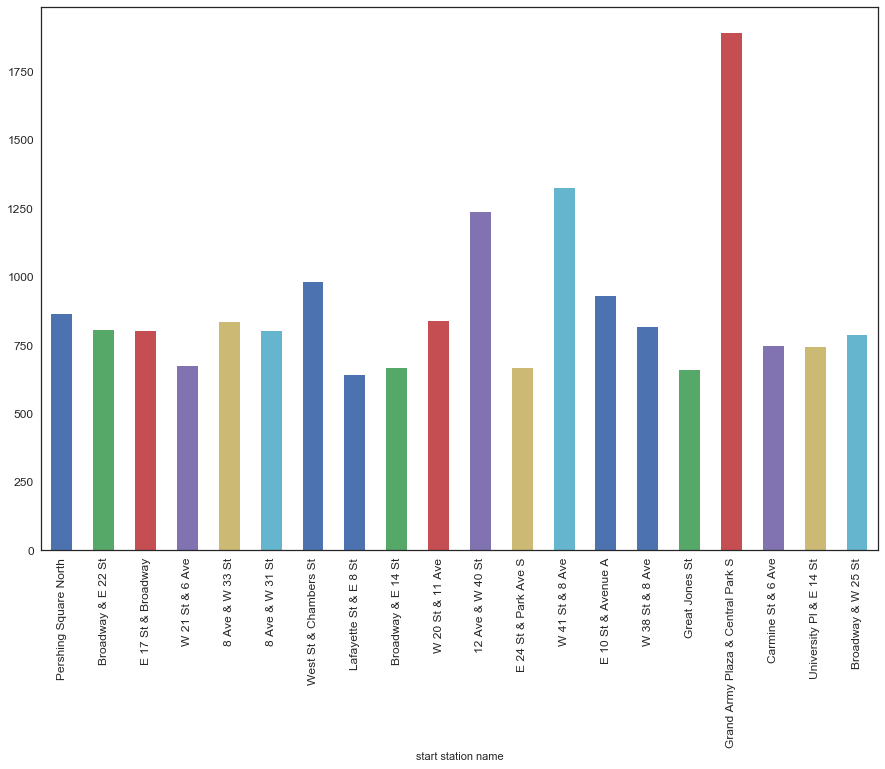

In [11]:
df2['mean'].plot(kind="bar", figsize=(15, 10), fontsize=12)

## Converts the 'starttime' column to datetime.

In [13]:
df1['starttime'] = pd.to_datetime(df1['starttime'])

In [14]:
df1.index = df1['starttime'] # Change the index to the 'starttime column'
del df1['starttime'] # deletes the 'startime' column.

In [15]:
df3 = pd.DataFrame(df1.resample('d').size()) # Top 20 days 

In [16]:
df3.head()

,0
starttime,
2018-10-01,71378
2018-10-02,73110
2018-10-03,76757
2018-10-04,70657
2018-10-05,74515


In [23]:
df3 = df3.rename(columns={0: 'Total Trips'}) # Renames column to 'Total Trips'
df3['Day of Week'] = df3.index.dayofweek # Changes to the day of the week by number 
grph = df3.replace({'Day of Week':{0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}}) # replace day by number with string

In [25]:
grph.head() # To verify that the above cell is correct.

,Total Trips,Day of Week
starttime,,
2018-10-01,71378,Mon
2018-10-02,73110,Tues
2018-10-03,76757,Wed
2018-10-04,70657,Thurs
2018-10-05,74515,Fri


## Plots the Total Trips by Day

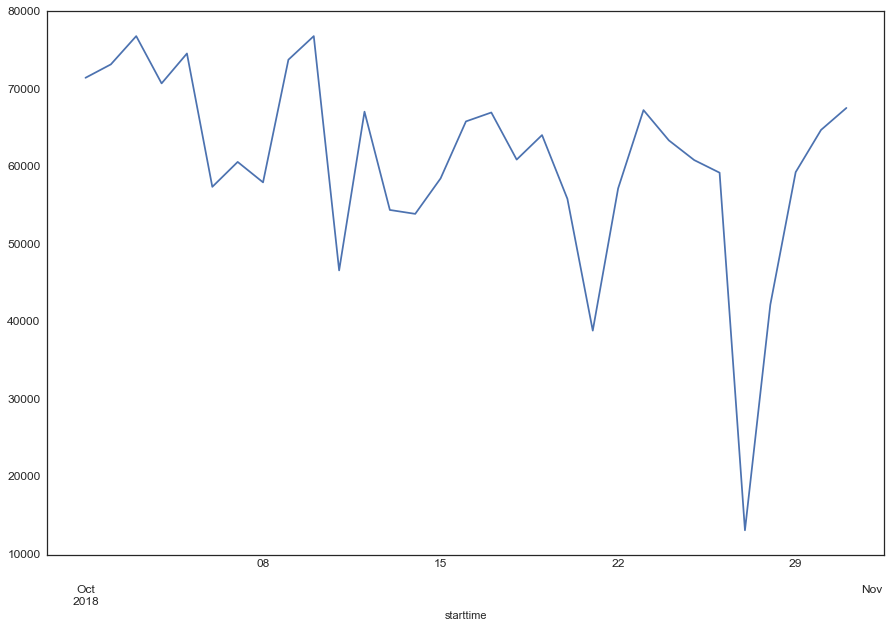

In [26]:
grph['Total Trips'].plot(figsize=(15, 10), fontsize=12) 